# Goals

This is mainly for me to load in the data I'm using and visualize it in different ways

**Data in use**

- COSMOS2020:
    - *Description* --- Photometric catalog
    - *Shape* --- (1720700,753)
    - *Useful Columns* ---

    |Python_ID|Ref_Name|Description|
    |:---:|:---:|:---:|
    |0|ID|COSMOS2020 ID|
    |1|ALPHA_J2000| RA (deg)|
    |2|DELTA_J2000| Dec (deg)|
    |594|lp_type|LePhare type (0: galaxy, 1: star, 2: Xray sour., -9: failure in fit)|
    |595|lp_zPDF|Median photo-z using the galaxy templ., median of likelihood distr.|
    |596|lp_zPDF_l68|Lower 68% confidence interval from PDF|
    |597|lp_zPDF_u68|Upper 68% confidence interval from PDF|
    |624|lp_mass_med|Median LePhare BC03 log stellar mass at zPDF|
    |625|lp_mass_med_min68|Lower 68% LePhare BC03 log stellar mass at zPDF|
    |626|lp_mass_med_max68|Upper 68% LePhare BC03 log stellar mass at zPDF|
    |628|lp_SFR_med|LePhare BC03 log SFR at zPDF|
    |629|lp_SFR_med_min68|LePhare BC03 log SFR at zPDF, lower limit, 68% confidence level|
    |630|lp_SFR_med_max68|LePhare BC03 log SFR at zPDF, upper limit, 68% confidence level|

\\

- Master specz COSMOS:
    - *Description* --- Catalog of spectroscopically targeted objects in the COSMOS field from a number of surveys. Essentially this was a combo of surveys in parts of the COSMOS field. So not all of the COSMOS data is represented here, but there are also some objects which have spectra but were not in the original C20 survey either (i.e. they don't have a corresponding COSMOS ID)
    - *Shape* --- (42776, 32)
    - *Surveys* ---
        - C3VO-DEIMOS  = 986
        - C3VO-MOSFIRE  = 318
        - Casey  = 7
        - DEIMOS10k  = 10128
        - Diener  = 1
        - HETDEX  = 5
        - MAGAZ3NE  = 72
        - VUDS  = 4485
        - zCOSMOS  = 26774

In [2]:
### Imports ###
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits

### Loading in Data

In [3]:
### Load in Catalog Data ###

# Cosmos
cosmos_file = fits.open(r"C:/Users/sikor/OneDrive/Desktop/BigData/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0.fits")
c_head = cosmos_file[0].header
cosmos_head = cosmos_file[1].header
cosmos = cosmos_file[1].data

# Spec-z catalog
specz_cat = np.loadtxt("./Data/master_specz_COSMOS_BF_v4b.cat", dtype=object)   # Load in the data
# Fix up the formatting for the spec data-file:
new_array = []
for idx in range(specz_cat.shape[1]):
    try:
        col = specz_cat[:,idx].astype(np.float32)
    except:
        col = specz_cat[:,idx]
    new_array.append(col)

specz_cat = np.array(new_array, dtype=object)
specz_cat = np.transpose(specz_cat)

print(f"Shape of COSMOS2020: {cosmos.shape}")
print(f"Shape of COSMOS Specz: {specz_cat.shape}")

Shape of COSMOS2020: (1720700,)
Shape of COSMOS Specz: (42776, 32)


### Plotting Redshift distribution of specz catalog

In [4]:
total = 0

for s in np.unique(specz_cat[:,2]):
    l = np.where(specz_cat[:,2]== s)[0]
    total += len(l)
    print(s, f" = {len(l)}")

print()
print("Total: ", total)

C3VO-DEIMOS  = 986
C3VO-MOSFIRE  = 318
Casey  = 7
DEIMOS10k  = 10128
Diener  = 1
HETDEX  = 5
MAGAZ3NE  = 72
VUDS  = 4485
zCOSMOS  = 26774

Total:  42776


I'm going to plot the complete redshift distribution for the Cosmos specz catalog. I'll make two different plots:
- Redshift dist. for objects with a measured spectroscopic redshift
- Redshift dist. for objects with a photz (from the cosmos catalog)

C:\Users\sikor\AppData\Local\Temp\ipykernel_39196\1875415467.py:6: RuntimeWarning: invalid value encountered in greater
  photz = np.where((specz_cat[:,12] > 0))     # Galaxies w/ some photz


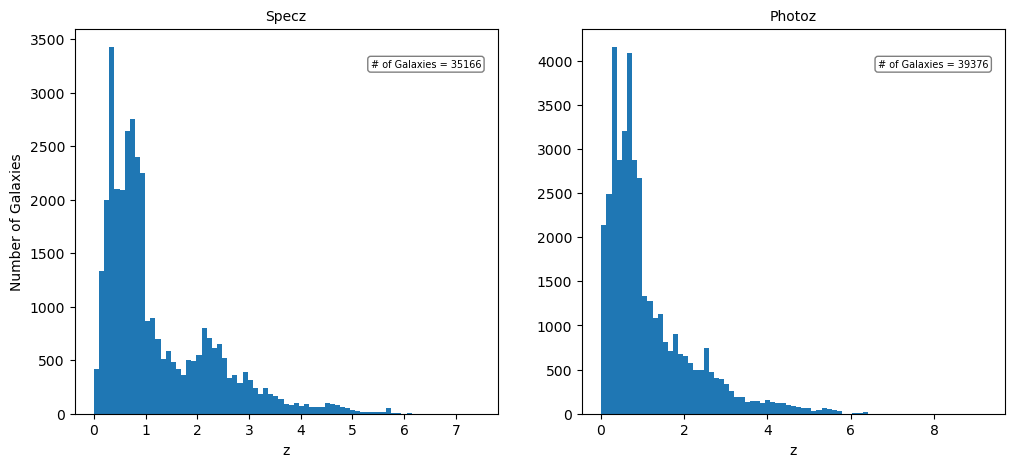

In [5]:
### Total Redshift Distribution ###
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,5)

specz = np.where((specz_cat[:,11] > 0))     # Galaxies w/ some specz
photz = np.where((specz_cat[:,12] > 0))     # Galaxies w/ some photz

# Left plot is histogram of specz distribution in redshift
ax[0].hist(specz_cat[:,11][specz], bins=75)
ax[0].set_xlabel("z")
ax[0].set_ylabel("Number of Galaxies")
ax[0].set_title(f"Specz", fontsize=10)
bbox = dict(boxstyle='round', fc = "white", ec='k', alpha=0.5)
ax[0].text(0.7, 0.9, f"# of Galaxies = {len(specz_cat[:,11][specz])}", fontsize=7,
                    bbox=bbox,transform=ax[0].transAxes)

# Right plot is histogram of photz distribution in redshift
ax[1].hist(specz_cat[:,12][photz], bins=75)
ax[1].set_xlabel("z")
ax[1].set_title(f"Photoz", fontsize=10)
bbox = dict(boxstyle='round', fc = "white", ec='k', alpha=0.5)
ax[1].text(0.7, 0.9, f"# of Galaxies = {len(specz_cat[:,12][photz])}", fontsize=7,
                    bbox=bbox,transform=ax[1].transAxes)

plt.show()

Plot the specz and photz distribution as above, but now for each individual survey.

C:\Users\sikor\AppData\Local\Temp\ipykernel_39196\3969182139.py:12: RuntimeWarning: invalid value encountered in greater
  photz = np.where((specz_cat[:,12] > 0)  & (specz_cat[:,2] == survey)) # Sort photz by survey name


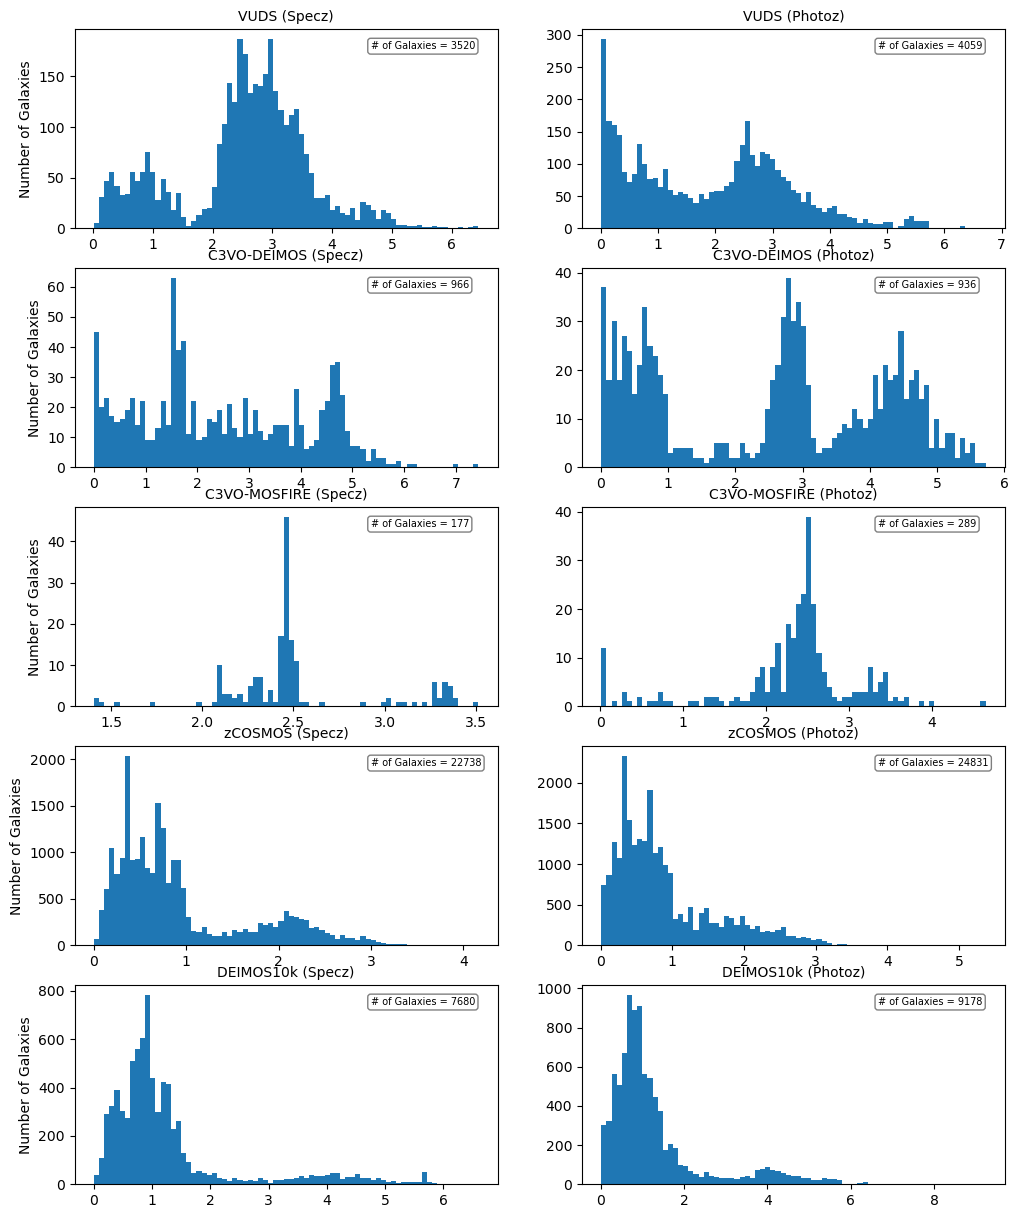

In [6]:
### Redshift Distribution per survey ###
surveys = ["VUDS", "C3VO-DEIMOS", "C3VO-MOSFIRE", "zCOSMOS", "DEIMOS10k"]


fig, ax = plt.subplots(len(surveys),2)
fig.set_size_inches(12,15)


for plot_idx, survey in enumerate(surveys):

    specz = np.where((specz_cat[:,11] > 0) & (specz_cat[:,2]== survey))  # Sort specz by survey name
    photz = np.where((specz_cat[:,12] > 0)  & (specz_cat[:,2] == survey)) # Sort photz by survey name

    # Make histogram for specz for given survey
    ax[plot_idx][0].hist(specz_cat[:,11][specz], bins=75)
    if plot_idx == len(surveys): ax[plot_idx][0].set_xlabel("z")
    ax[plot_idx][0].set_ylabel("Number of Galaxies")
    ax[plot_idx][0].set_title(f"{survey} (Specz)", fontsize=10)
    bbox = dict(boxstyle='round', fc = "white", ec='k', alpha=0.5)
    ax[plot_idx][0].text(0.7, 0.9, f"# of Galaxies = {len(specz_cat[:,11][specz])}", fontsize=7,
                        bbox=bbox,transform=ax[plot_idx][0].transAxes)

    # Make histogram for photz for given survey
    ax[plot_idx][1].hist(specz_cat[:,12][photz], bins=75)
    if plot_idx == len(surveys): ax[plot_idx][1].set_xlabel("z")
    ax[plot_idx][1].set_title(f"{survey} (Photoz)", fontsize=10)
    bbox = dict(boxstyle='round', fc = "white", ec='k', alpha=0.5)
    ax[plot_idx][1].text(0.7, 0.9, f"# of Galaxies = {len(specz_cat[:,12][photz])}", fontsize=7,
                        bbox=bbox,transform=ax[plot_idx][1].transAxes)

plt.show()

### Separate Hyperion Spec Galaxies

In [7]:
### Define the volume of Hyperion ###
ra_range = (149.6, 150.52)
dec_range = (1.74, 2.73)            # All values per Cucciati+ 2018
z_range = (2.35, 2.55)

In [8]:
### Narrow down the spec-targets ###
spec_use_idxs = np.where( (ra_range[0]<= specz_cat[:,4]) & (specz_cat[:,4] <= ra_range[1])          # RA check
                 & (dec_range[0] <= specz_cat[:,6]) & (specz_cat[:,6] <= dec_range[1])      # Dec check
                 & (z_range[0] <= specz_cat[:,11]) & (specz_cat[:,11]<= z_range[1])         # redshift check
                 & (2.5<= specz_cat[:,13]) & (specz_cat[:,13] < 10)         # Quality flag check
                 & (specz_cat[:,15]> 0))[0]         # make sure there's a legit stellar mass              


spec_use = specz_cat[spec_use_idxs]     # Trim the spec catalog to only include galaxies I care about

In [9]:
### Figure out what surveys are present in the data ###
total = 0

for s in np.unique(specz_cat[:,2]):
    l = np.where(spec_use[:,2]== s)[0]
    total += len(l)
    print(s, f" = {len(l)}")

print()
print("Total: ", total)

C3VO-DEIMOS  = 0
C3VO-MOSFIRE  = 79
Casey  = 4
DEIMOS10k  = 7
Diener  = 1
HETDEX  = 3
MAGAZ3NE  = 0
VUDS  = 127
zCOSMOS  = 171

Total:  392


In [10]:
survey_colors = {
    "C3VO-DEIMOS"  : 'seagreen',
    "C3VO-MOSFIRE"  : 'magenta',
    'Casey'  : 'mediumorchid',
    'DEIMOS10k'  : 'peru',
    'Diener'  : 'k',
    'HETDEX'  : 'goldenrod',
    'MAGAZ3NE'  : 'turquoise',
    'VUDS'  : 'limegreen',
    'zCOSMOS'  : 'orangered',
    'C20' : 'royalblue'

}

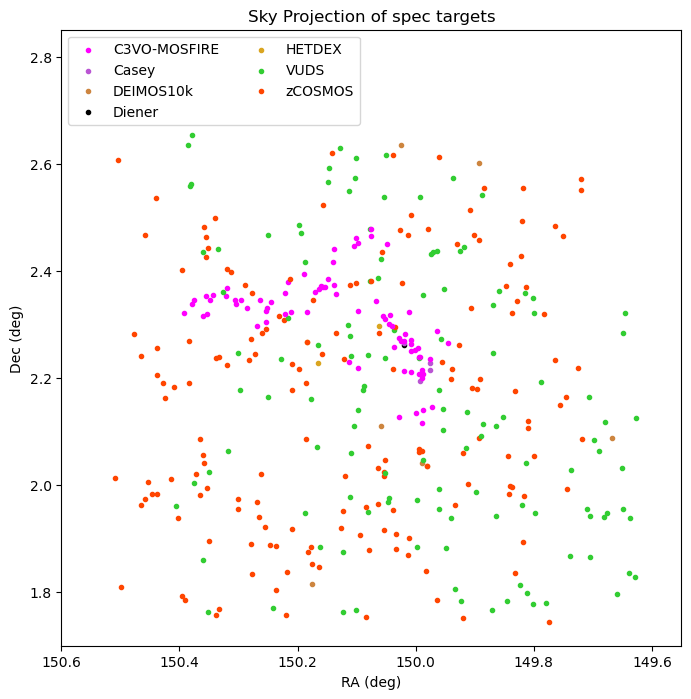

In [11]:
### Plot the distribution of spec observations

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

for d in spec_use:
    ax.scatter(d[4], d[6], marker='.', color=survey_colors[d[2]])
ax.set(title=r"Sky Projection of spec targets", xlabel=r"RA (deg)", ylabel=r"Dec (deg)", xlim=(149.55, 150.6), ylim=(1.7, 2.85))
plt.gca().invert_xaxis()

for s in np.unique(spec_use[:,2]):
    ax.scatter(0,0,marker='.', color=survey_colors[s], label=s)
plt.legend(loc="upper left", ncols=2)

plt.show()

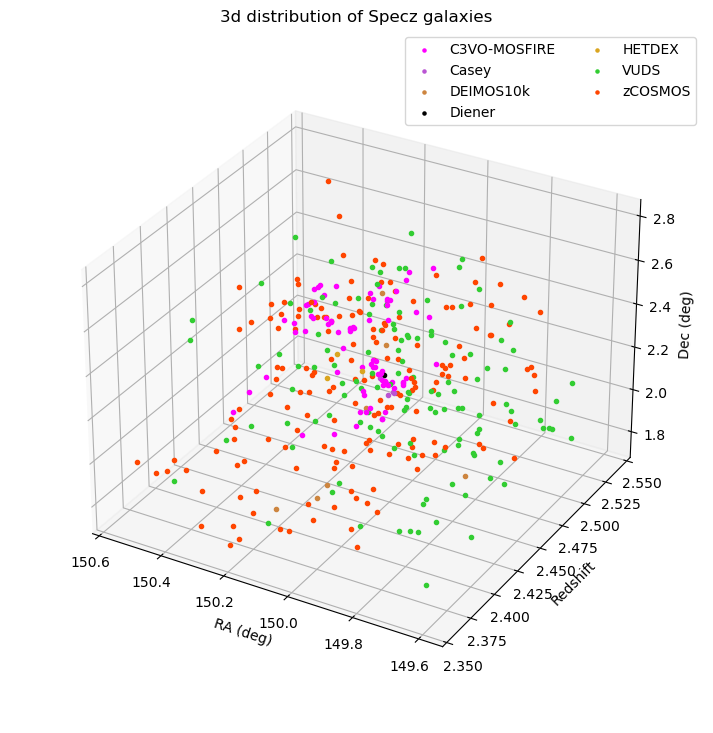

In [12]:
### Plot the 3d projection of the spec targets ###

fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(projection="3d")
ax.set_box_aspect(None, zoom=0.9)

for d in spec_use:
    ax.plot(d[4], d[11], d[6],  marker='.', color=survey_colors[d[2]])
ax.set(title=r"3d distribution of Specz galaxies", xlabel=r"RA (deg)", ylabel="Redshift", zlabel=r"Dec (deg)",
        xlim=(149.55, 150.6), zlim=(1.7, 2.85), ylim=(2.35,2.55))
plt.gca().invert_xaxis()

for s in np.unique(spec_use[:,2]):
    ax.scatter(0,0,marker='.', color=survey_colors[s], label=s)
plt.legend(loc="upper right", ncols=2)

plt.show()

### Sort the C20 data

In [22]:
### Narrow down the photo-targets ###
phot_use_idx = np.where( (ra_range[0]<= cosmos["ALPHA_J2000"]) & (cosmos["ALPHA_J2000"] <= ra_range[1])          # RA check
                 & (dec_range[0] <= cosmos["DELTA_J2000"]) & (cosmos["DELTA_J2000"] <= dec_range[1])      # Dec check
                 & (z_range[0] <= cosmos["lp_zPDF"]) & (cosmos["lp_zPDF"]<= z_range[1])         # redshift check
                 & (cosmos["lp_type"]==0))[0]           # Object type from lephare                     


phot_use = cosmos[phot_use_idx]     # Trim the spec catalog to only include galaxies I care about

# Get rid of galaxies that have a spec counterpart
idxs = []
for i, c20_id in enumerate(phot_use["ID"]):
    if c20_id in spec_use[:,0]: idxs.append(i)

phot_use = np.delete(phot_use, idxs, axis=0)

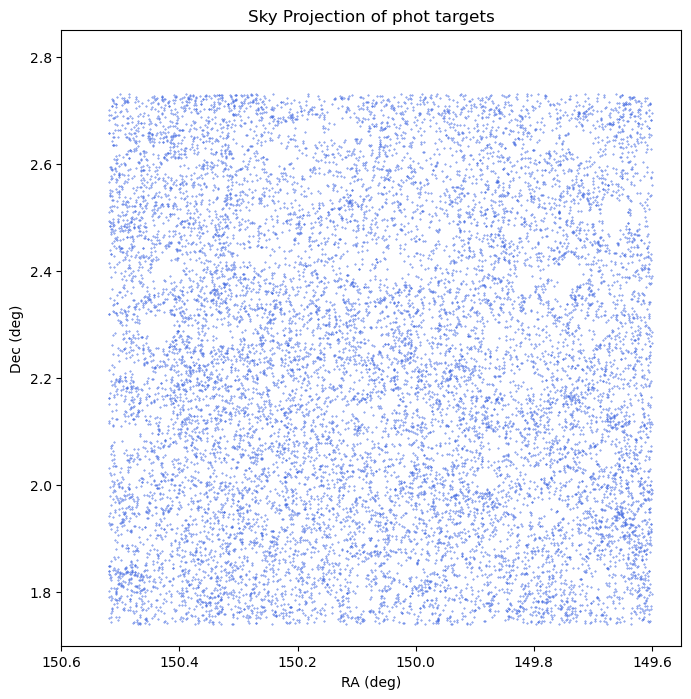

In [26]:
### Plot the sky-projection of the Cosmos data ###
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

ax.scatter(phot_use["ALPHA_J2000"], phot_use["DELTA_J2000"], s = 0.5, marker=".", color = "royalblue")

ax.set(title=r"Sky Projection of phot targets", xlabel=r"RA (deg)", ylabel=r"Dec (deg)", xlim=(149.55, 150.6), ylim=(1.7, 2.85))
plt.gca().invert_xaxis()


plt.show()

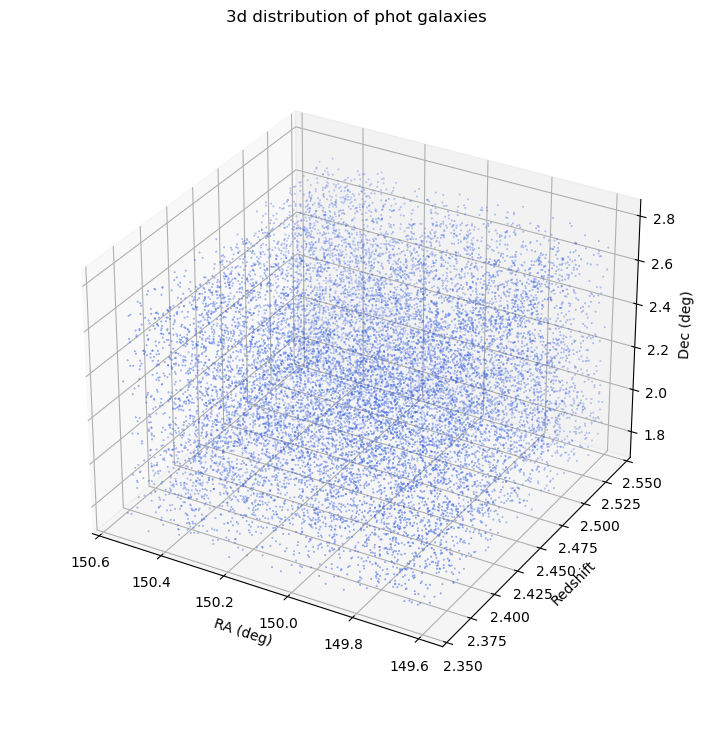

In [27]:
### Plot the 3d projection of the spec targets ###

fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(projection="3d")
ax.set_box_aspect(None, zoom=0.9)

ax.scatter(phot_use["ALPHA_J2000"], phot_use["lp_zPDF"], phot_use["DELTA_J2000"], s = 0.5, marker=".", color = "royalblue")

ax.set(title=r"3d distribution of phot galaxies", xlabel=r"RA (deg)", ylabel="Redshift", zlabel=r"Dec (deg)",
        xlim=(149.55, 150.6), zlim=(1.7, 2.85), ylim=(2.35,2.55))
plt.gca().invert_xaxis()



plt.show()

## Total sample

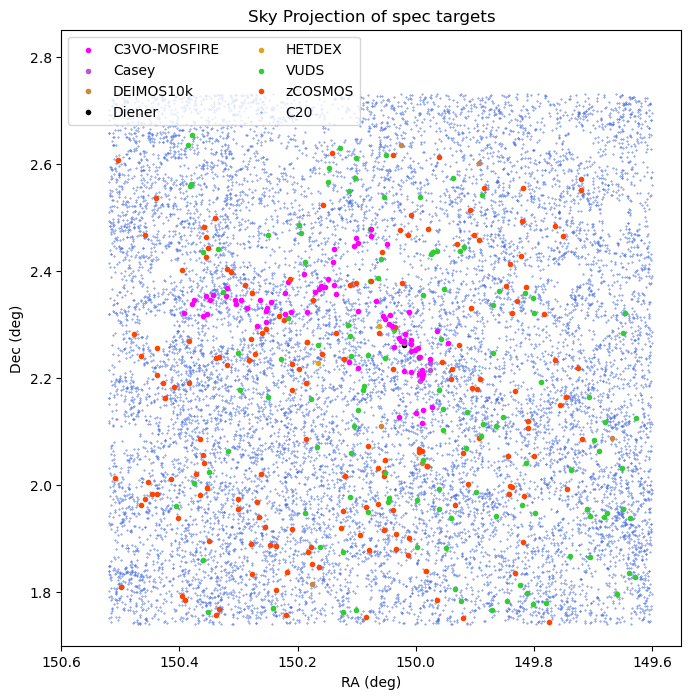

In [28]:
### Plot the distribution of spec observations

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

# Plot phot
ax.scatter(phot_use["ALPHA_J2000"], phot_use["DELTA_J2000"], s = 0.5, marker=".", color = "royalblue")

# Plot spec
for d in spec_use:
    ax.scatter(d[4], d[6], marker='.', color=survey_colors[d[2]])


ax.set(title=r"Sky Projection of spec targets", xlabel=r"RA (deg)", ylabel=r"Dec (deg)", xlim=(149.55, 150.6), ylim=(1.7, 2.85))
plt.gca().invert_xaxis()

# Make legend
for s in np.unique(spec_use[:,2]):
    ax.scatter(0,0,marker='.', color=survey_colors[s], label=s)
ax.scatter(0,0,marker='.', s=0.5, color=survey_colors["C20"], label="C20")


plt.legend(loc="upper left", ncols=2)

plt.show()

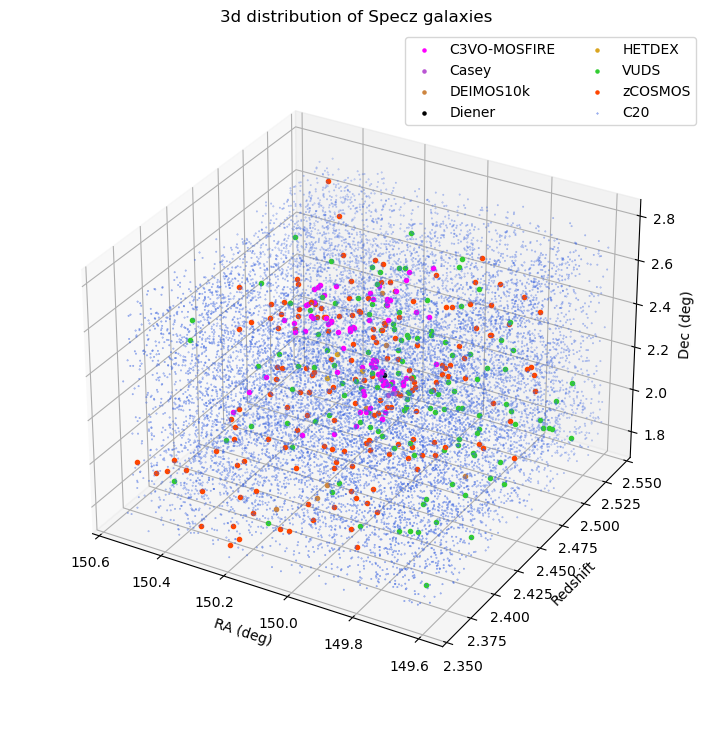

In [29]:
### Plot the 3d projection of the spec targets ###

fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(projection="3d")
ax.set_box_aspect(None, zoom=0.9)

# Plot phot
ax.scatter(phot_use["ALPHA_J2000"], phot_use["lp_zPDF"], phot_use["DELTA_J2000"], s = 0.5, marker=".", color = "royalblue")

# Plot spec
for d in spec_use:
    ax.plot(d[4], d[11], d[6],  marker='.', color=survey_colors[d[2]])

    
ax.set(title=r"3d distribution of Specz galaxies", xlabel=r"RA (deg)", ylabel="Redshift", zlabel=r"Dec (deg)",
        xlim=(149.55, 150.6), zlim=(1.7, 2.85), ylim=(2.35,2.55))
plt.gca().invert_xaxis()

for s in np.unique(spec_use[:,2]):
    ax.scatter(0,0,0,marker='.', color=survey_colors[s], label=s)
ax.scatter(0,0,0,marker='.', s=0.5, color=survey_colors["C20"], label="C20")


plt.legend(loc="upper right", ncols=2)

plt.show()

# Write to data files:

In [30]:
np.savetxt("Data/Hyperion_C20_spec.txt", spec_use, fmt='%s')

np.save("Data/Hyperion_C20_phot.npy", phot_use)